In [102]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
sns.set(style='white', palette='muted', color_codes=True)
import plotly.express as px 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

In [103]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler 
from sklearn.compose import ColumnTransformer 
from sklearn.metrics import r2_score, mean_squared_error, silhouette_score, confusion_matrix, accuracy_score 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression 
from sklearn.cluster import KMeans 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor 
from sklearn.model_selection import train_test_split

In [104]:
data = pd.read_csv(r'c:\Github\Sol\the_data\data-lab-3-insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [105]:
# data.drop(columns=['Age', 'BMI'], axis=1, inplace=True)
# data.info()

In [106]:
data.duplicated().sum()
data.drop_duplicates(subset=None, inplace=True, keep='first', ignore_index=False)
data.duplicated().sum()

0

In [107]:
mis_col = data.isna().sum() * 100/len(data)
mis_col.sort_values(ascending=False)
mis_col

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [108]:
orig_sex = data.sex 

le = LabelEncoder()



data.sex = le.fit_transform(data.sex)
le_sex = data.sex


dic_orig_sex = np.unique(orig_sex)
dic_le_sex = np.unique(le_sex)

sex_dic = dict(zip(dic_orig_sex,dic_le_sex))
sex_dic

{'female': 0, 'male': 1}

Text(0.5, 1.0, 'Correlation Matrix')

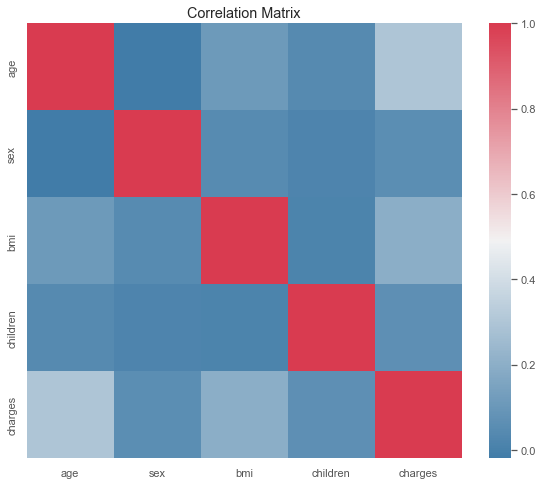

In [109]:
f,ax = plt.subplots(figsize=(10,8))

data_corr = data.corr()

sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_), cmap=sns.diverging_palette(240,8, as_cmap=True), ax=ax, square=True)

ax.set_title('Correlation Matrix')